<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(0,41,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,101,1),'humidity')
people = ctrl.Antecedent(np.arange(0,11,1),'people')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0,101,1),'cooling_level')
temperature['cold'] = fuzz.trimf(temperature.universe,[0,0,11])
temperature['cool'] = fuzz.trimf(temperature.universe,[10,15,23])
temperature['comfortable'] = fuzz.trimf(temperature.universe,[20,25,28])
temperature['warm'] = fuzz.trimf(temperature.universe,[27,30,33])
temperature['hot'] = fuzz.trimf(temperature.universe,[31,40,40])
humidity['low'] = fuzz.trimf(humidity.universe,[0,0,30])
humidity['medium'] = fuzz.trimf(humidity.universe,[29,50,70])
humidity['high'] = fuzz.trimf(humidity.universe,[60,100,100])
people['few'] = fuzz.trimf(people.universe,[0,0,3])
people['moderate'] = fuzz.trimf(people.universe,[2,5,7])
people['many'] = fuzz.trimf(people.universe,[6,10,10])
fan_speed['low'] = fuzz.trimf(fan_speed.universe,[0,0,30])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe,[29,50,70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe,[69,80,100])
cooling_level['low'] = fuzz.trimf(cooling_level.universe,[0,0,30])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe,[29,50,70])
cooling_level['high'] = fuzz.trimf(cooling_level.universe,[69,80,100])

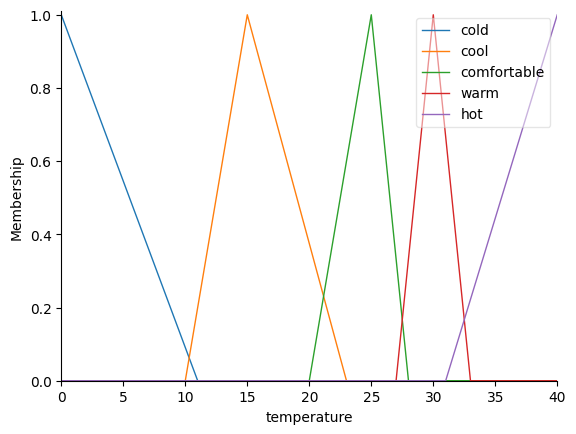

In [ ]:
temperature.view()

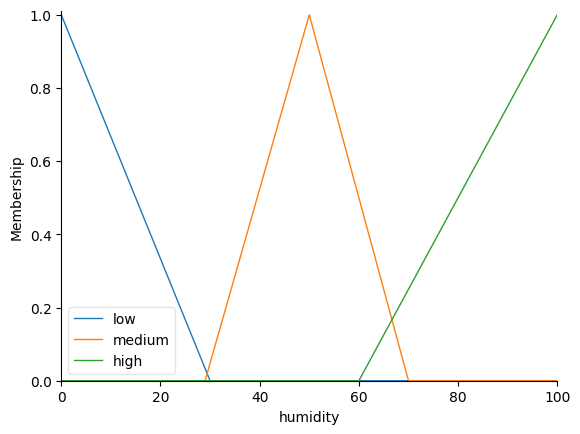

In [ ]:
humidity.view()

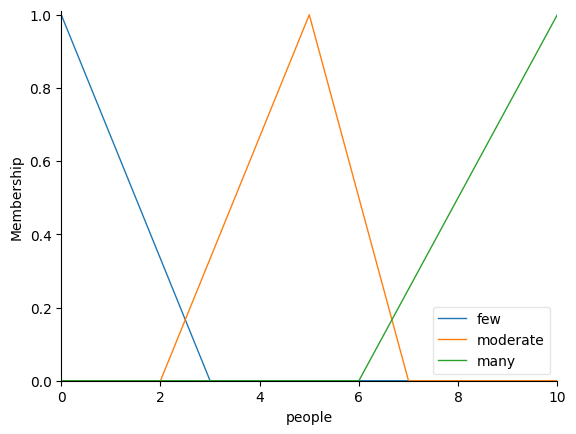

In [ ]:
people.view()

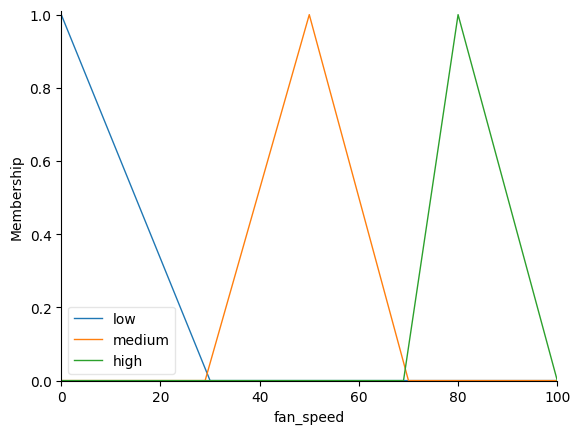

In [ ]:
fan_speed.view()

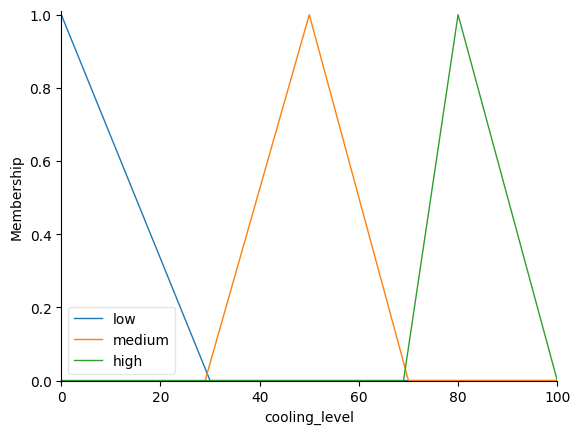

In [ ]:
cooling_level.view()

In [ ]:
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['comfortable'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['hot'], fan_speed['high'])

rule6 = ctrl.Rule(temperature['cold'], cooling_level['low'])
rule7 = ctrl.Rule(temperature['cool'], cooling_level['low'])
rule8 = ctrl.Rule(temperature['comfortable'], cooling_level['medium'])
rule9 = ctrl.Rule(temperature['warm'], cooling_level['high'])
rule10 = ctrl.Rule(temperature['hot'], cooling_level['high'])

rule11 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule12 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule13 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule14 = ctrl.Rule(people['few'], fan_speed['low'])
rule15 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule16 = ctrl.Rule(people['many'], fan_speed['high'])

rule17 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'], ( fan_speed['high'], cooling_level['high']))
rule18 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'], ( fan_speed['medium'], cooling_level['medium']))
rule19 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'], ( fan_speed['low'], cooling_level['low']))

tốc độ quạt:  trung bình
49.66666666666667
mức độ làm mát:  trung bình
49.66666666666667


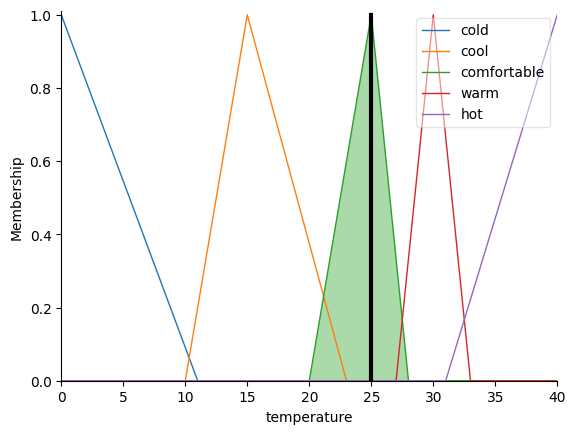

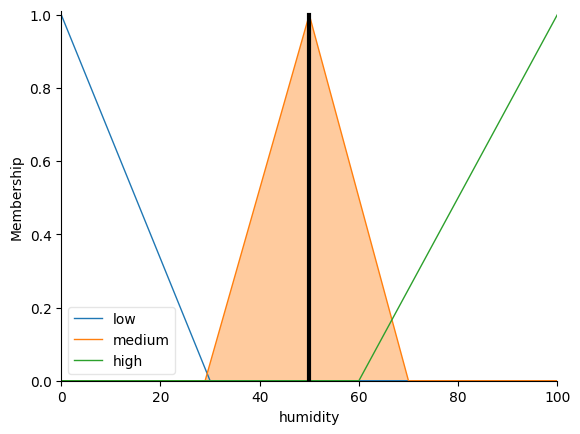

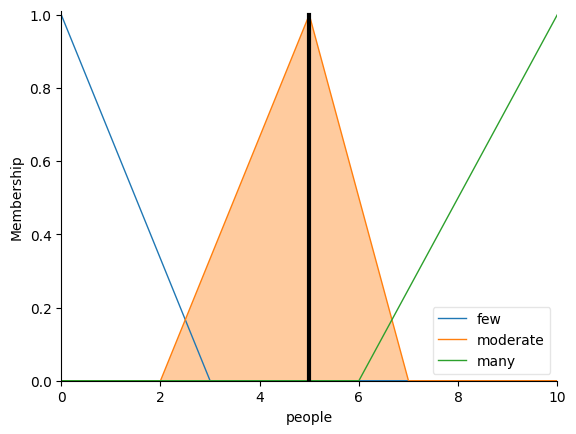

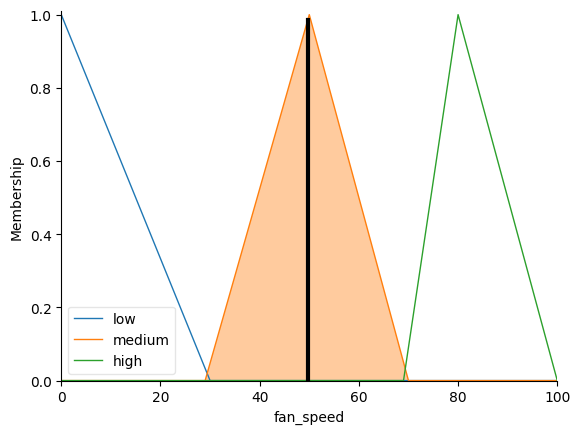

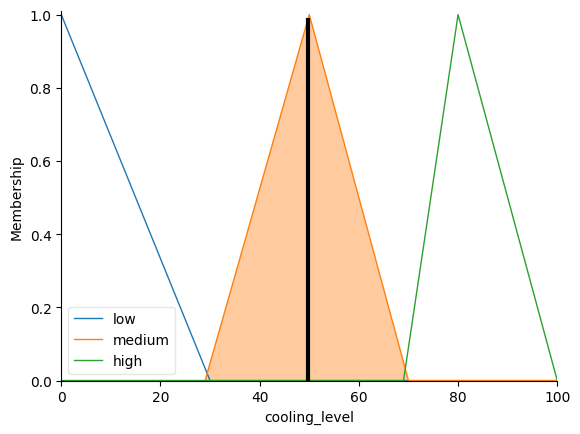

In [ ]:
from math import e
fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19])
fuzzy_system_sim = ctrl.ControlSystemSimulation(fuzzy_system)
fuzzy_system_sim.input['temperature'] = 25
fuzzy_system_sim.input['humidity'] = 50
fuzzy_system_sim.input['people'] = 5
fuzzy_system_sim.compute()
if fuzzy_system_sim.output['fan_speed'] < 30:
  print("tốc độ quạt: ", "thấp")
elif fuzzy_system_sim.output['fan_speed'] < 70 and fuzzy_system_sim.output['fan_speed'] >=30:
  print("tốc độ quạt: ", "trung bình")
else:
  print("tốc độ quạt: ", "cao")
print(fuzzy_system_sim.output['fan_speed'])

if fuzzy_system_sim.output['cooling_level'] < 30:
  print("mức độ làm mát: ", "thấp")
elif fuzzy_system_sim.output['cooling_level'] < 70 and fuzzy_system_sim.output['cooling_level'] >=30:
  print("mức độ làm mát: ", "trung bình")
else:
  print("mức độ làm mát: ", "cao")
print(fuzzy_system_sim.output['cooling_level'])

temperature.view(sim=fuzzy_system_sim)
humidity.view(sim=fuzzy_system_sim)
people.view(sim=fuzzy_system_sim)
fan_speed.view(sim=fuzzy_system_sim)
cooling_level.view(sim=fuzzy_system_sim)